In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit
from scipy import interpolate
import pickle


from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
data = json.load(open("SFdata//OrionSmall.json"))

pixscale = 0.534 # arcsec
pixscale *= 0.00242               # parsec
s0 = 0.00242/2.355              # parsec
m = 1.5

In [4]:
r = pixscale * 10**np.array(data["log10 r"])
rgrid = pixscale * np.logspace(0.0, 2.5)

B = np.array(data["Unweighted B(r)"])

sig2 = data["Unweighted sigma^2"]
#r0 = np.interp(sig2, B, r)
r0=0.06

In [5]:
B

array([ 0.03003837,         nan,         nan,  0.06785312,         nan,
               nan,  0.14968342,         nan,         nan,  0.23988708,
        0.29402191,  0.37346996,  0.45702026,  0.58125434,  0.68152507,
        0.81216971,  0.98655155,  1.17262712,  1.34330198,  1.57463499,
        1.83788227,  2.13422315,  2.4161397 ,  2.76577165,  3.12873929,
        3.53846439,  4.00523208,  4.54797008,  5.13706691,  5.78234842,
        6.51103632,  7.30448384,  8.16757749,  9.08635673, 10.03505352,
       11.02282416, 12.05374302, 13.13034968, 14.26258337, 15.42429846,
       16.53192022, 17.64406484, 18.74068919, 19.76158289, 20.71015744,
       21.34719298, 21.63493842, 21.94870181, 22.79725207, 23.60219702,
       22.57620803, 17.34896532, 12.56060677,  8.15425584,  6.62493581])

In [6]:
B=B[9:55]
r=r[9:55]

(9.375506960018136, 0.06)

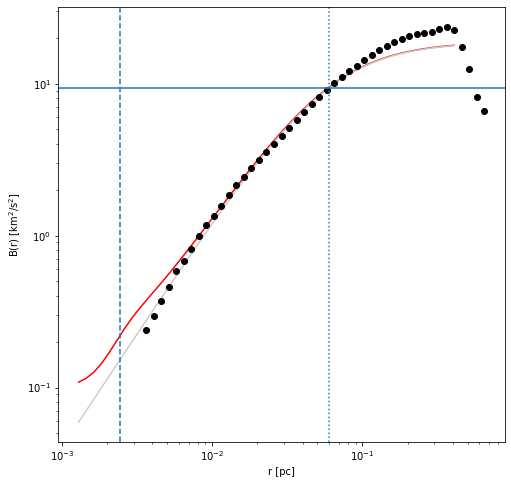

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
# Plot fit to unweighted strucfunc
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, s0, 1/10), color="red")
ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
# Plot points from unweighted strucfunc
ax.plot(r, B, 'o',  color='black')

ax.axhline(sig2)
ax.axvline( 2.355  * s0, linestyle="dashed")
ax.axvline(r0, linestyle="dotted")

ax.set(
    xscale = "log",
    yscale = "log",
#    ylim  = [1, 250],
#    xlim  = [1, 150],
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
)

sig2,r0

In [8]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [9]:
relative_uncertainty = 0.15
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 3

In [10]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
#model02.set_param_hint("sig2", value=sig2, vary=False)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2        nan        0      inf     True    


In [11]:
result2 = model02.fit(
    B, 
    weights=weights,
    r=r, r0=r0, m=m, s0=s0, noise=1/10, sig2=sig2
)

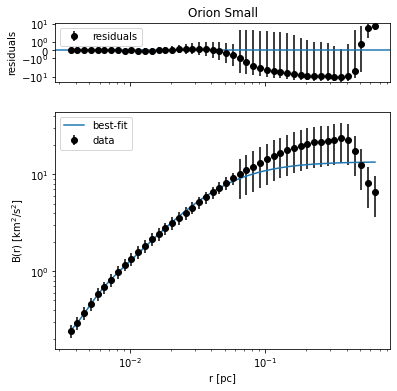

In [12]:
fig, _ = result2.plot( 'ko')
fig.axes[0].set(
    title='Orion Small',
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale = "log",
    yscale = "log",
    xlabel = "r [pc]",
    ylabel = r"B(r) [km$^{2}$/s$^{2}$]",
);

plt.savefig('SFpaper//OS.pdf', bbox_inches='tight')

In [13]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 46
    # variables        = 5
    chi-square         = 17.5710041
    reduced chi-square = 0.42856107
    Akaike info crit   = -34.2700021
    Bayesian info crit = -25.1267951
[[Variables]]
    r0:     0.04276649 +/- 0.00434836 (10.17%) (init = 0.06)
    sig2:   6.68161433 +/- 0.55120517 (8.25%) (init = 9.375507)
    m:      1.65819025 +/- 0.07737737 (4.67%) (init = 1.5)
    s0:     0.00225042 +/- 3.1272e-04 (13.90%) (init = 0.001027601)
    noise:  0.17126673 +/- 0.04929402 (28.78%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(r0, sig2)  =  0.921
    C(s0, noise) =  0.881
    C(r0, m)     = -0.818
    C(sig2, m)   = -0.640
    C(r0, s0)    =  0.235
    C(m, noise)  =  0.205
    C(m, s0)     = -0.124


In [14]:
#for p in result2.model.param_names:
#    result2.params[p].stderr = result2.params[p].value * 0.1

In [15]:
result2.conf_interval()
print(result2.ci_report())

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:327: UserWarning: rel_change=1.3515521621713976e-06 < 1e-05 at iteration 6 and prob(s0=0.00037407778323557384) = 0.9638146167295036 < max(sigmas).
  warn(errmsg)


          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :  -0.01090  -0.00741  -0.00382   0.04277  +0.00422  +0.00912  +0.01514
 sig2 :  -1.51542  -1.00874  -0.50803   6.68161  +0.53221  +1.10864  +1.75649
 m    :  -0.21596  -0.14081  -0.07062   1.65819  +0.07491  +0.15835  +0.25621
 s0   :      -inf  -0.00114  -0.00038   0.00225  +0.00029  +0.00058  +0.00088
 noise:      -inf      -inf  -0.07143   0.17127  +0.04195  +0.07580  +0.10679


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\lmfit\confidence.py:312: UserWarning: Bound reached with prob(noise=0.0) = 0.8460862843146187 < max(sigmas)
  warn(errmsg)


In [16]:
plt.style.use([
    "seaborn-poster",
])

In [17]:
plot_limits = {
    "s0": [0.0001, 0.006],
    "m": [1.1, 1.8],
    "r0": [0.04, 0.1],
    "noise": [0.0, 0.5],
}

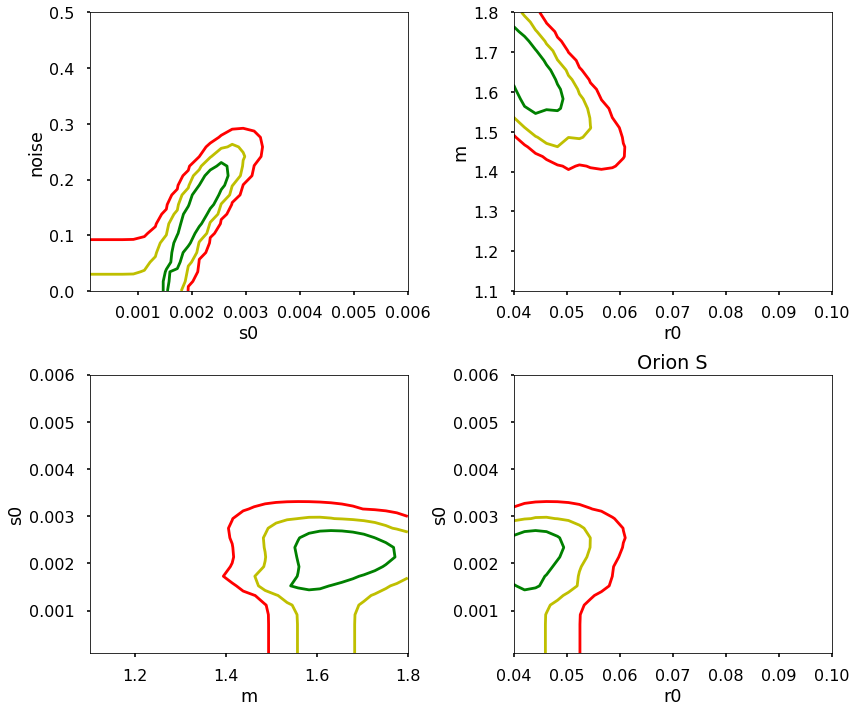

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('Orion S')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 30, 30,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [19]:
x=r
y=B-2*sig2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([0.16287097, 0.44609882])

In [20]:
r.max()/result2.params['r0'].value

15.144432603504793

In [21]:
(r[0]/2**0.5)*((result2.params['r0'].value/r[0])**(result2.params['m'].value/2))

0.019850143049745545

In [22]:
f = open('CI//OrionS.pkl',"wb")
pickle.dump(result2,f)
f.close()

In [23]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 37.781405448913574 seconds ---
